In [1]:
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [ ]:
# Carregar o dataset
with ZipFile('base/consumidor_reclamacoes/consumidor_reclamacoes.zip', 'r') as arquivo:
    reclamacoes = pd.read_csv(arquivo.open("reclamacoes.csv"), encoding='utf-8', on_bad_lines='skip', delimiter=';')
    contexto = pd.read_csv(arquivo.open("reclamacoes_contexto.csv"), encoding='utf-8', on_bad_lines='skip', delimiter=';')

In [3]:
# Análise Exploratória: O objetivo dessa segunda parte é analisar e visualizar as informações no dataset, para determinar a melhor forma de fazer a análise em seguida. Primeiramente, determinaremos que informações úteis estão contidas no dataset.
reclamacoes

,DataExtracao,SOLICITAÇÕES,Ano,Mês,AnoMês,UF,Cidade,CO_MUNICIPIO,CanalEntrada,Condição,TipoAtendimento,Serviço,Marca,Assunto,Problema
0,2018-04-23,1,2015,1,2015-01,DF,Brasília,5300108,SIC,Reencaminhada,Pedido de Informação,Outros,Outros,NÃO APLICÁVEL,SIC
1,2018-04-23,1,2015,1,2015-01,AC,Rio Branco,1200401,Fale Conosco,Nova,Reclamação,STFC,OI,Bloqueio ou Suspensão e Desbloqueio,Bloqueio ou suspensão indevido
2,2018-04-23,1,2015,1,2015-01,AL,Maceió,2704302,Fale Conosco,Nova,Reclamação,SMP_Pós,VIVO,Qualidade e Funcionamento do Serviço ou Equipa...,Lentidão ou velocidade reduzida de conexão
3,2018-04-23,1,2015,1,2015-01,AM,Manaus,1302603,Fale Conosco,Reencaminhada,Reclamação,SMP_Pré,VIVO,Crédito Pré-pago,Crédito pré-pago cobrado de maneira indevida
4,2018-04-23,1,2015,1,2015-01,AM,Manaus,1302603,Fale Conosco,Nova,Reclamação,STFC,OI,Qualidade e Funcionamento do Serviço ou Equipa...,Interrupção do serviço
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15952402,2020-06-16,1,2020,1,2020-01,TO,Palmas,1721000,Call Center,Nova,Reclamação,SMP_Pós,OI,"Qualidade, Funcionamento e Reparo",Linha muda ou sem sinal
15952403,2020-06-16,1,2020,1,2020-01,TO,Palmas,1721000,Usuário WEB,Nova,Reclamação,SeAC,CLARO,Cobrança,Cobrança em desacordo com o contratado
15952404,2020-06-16,1,2020,1,2020-01,TO,Paraíso do Tocantins,1716109,Call Center,Nova,Reclamação,STFC,OI,Cobrança,Cobrança em desacordo com o contratado
15952405,2020-06-16,1,2020,1,2020-01,TO,Porto Nacional,1718204,Call Center,Nova,Reclamação,SMP_Pós,OI,Dados cadastrais ou número da linha,Alteração do número de linha não solicitada


In [4]:
contexto

,DataExtracao,SOLICITAÇÕES,Ano,Mês,AnoMês,UF,Cidade,CO_MUNICIPIO,CanalEntrada,Condição,TipoAtendimento,Serviço,Marca,Assunto,Problema,Linha
0,2025-01-10,1,2021,6,2021-06,MG,Ibirité,3129806,CALL CENTER,NOVA,RECLAMAÇÃO,STFC,OI,COBRANÇA,COBRANÇA DURANTE O PERÍODO DE INTERRUPÇÃO DO S...,1
1,2025-01-10,2,2021,3,2021-03,RJ,Rio de Janeiro,3304557,MOBILE APP,NOVA,RECLAMAÇÃO,SCM,OI,COBRANÇA,COBRANÇA DE VALORES QUE JÁ FORAM PAGOS,2
2,2025-01-10,1,2021,5,2021-05,MG,Ibirité,3129806,USUÁRIO WEB,NOVA,RECLAMAÇÃO,SMP_Pré,OI,"PLANO DE SERVIÇOS, OFERTA, BÔNUS, PROMOÇÕES E ...",NÃO DISPONIBILIZAÇÃO DE BÔNUS PROMOCIONAIS,3
3,2025-01-10,2,2021,3,2021-03,RJ,Rio de Janeiro,3304557,MOBILE APP,NOVA,RECLAMAÇÃO,SCM,CLARO,MUDANÇA DE ENDEREÇO,MUDANÇA DE ENDEREÇO RECUSADA PELA OPERADORA,4
4,2025-01-10,1,2021,6,2021-06,AC,Rio Branco,1200401,CALL CENTER,NOVA,RECLAMAÇÃO,SMP_Pré,CLARO,"BLOQUEIO, DESBLOQUEIO OU SUSPENSÃO",NÃO CONSEGUE BLOQUEAR OU SUSPENDER TEMPORARIAM...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072304,2025-08-11,1,2025,6,2025-06,RN,Natal,2408102,USUÁRIO WEB,NOVA,RECLAMAÇÃO,SCM,ALARES,COBRANÇA,COBRANÇA APÓS CANCELAMENTO,7072305
7072305,2025-08-11,1,2025,1,2025-01,RN,Natal,2408102,MOBILE APP,NOVA,RECLAMAÇÃO,SCM,ALARES,COBRANÇA,COBRANÇA APÓS CANCELAMENTO,7072306
7072306,2025-08-11,1,2025,7,2025-07,GO,Jataí,5211909,MOBILE APP,NOVA,RECLAMAÇÃO,SCM,ALLREDE TELECOM,"QUALIDADE, FUNCIONAMENTO E REPARO",PERSISTÊNCIA DO PROBLEMA APÓS REPARO,7072307
7072307,2025-08-11,1,2025,7,2025-07,PR,Apucarana,4101408,MOBILE APP,NOVA,RECLAMAÇÃO,SCM,PERSÖS TELECOM,CANCELAMENTO,NÃO CONSEGUE CANCELAR UMA PARTE DO PACOTE DE S...,7072308


In [5]:
# Vamos ver novamente quais são as colunas do dataset:
reclamacoes.columns

Index(['DataExtracao', 'SOLICITAÇÕES', 'Ano', 'Mês', 'AnoMês', 'UF', 'Cidade',
       'CO_MUNICIPIO', 'CanalEntrada', 'Condição', 'TipoAtendimento',
       'Serviço', 'Marca', 'Assunto', 'Problema'],
      dtype='object')

In [6]:
contexto.columns

Index(['DataExtracao', 'SOLICITAÇÕES', 'Ano', 'Mês', 'AnoMês', 'UF', 'Cidade',
       'CO_MUNICIPIO', 'CanalEntrada', 'Condição', 'TipoAtendimento',
       'Serviço', 'Marca', 'Assunto', 'Problema', 'Linha'],
      dtype='object')

In [7]:
# A única diferença entre os datasets "reclamacao" e "contexto", além dos dados diferentes, é a coluna "Linha", que é apenas um índice, e portanto, pode ser ignorada.
contexto.drop("Linha", axis=1, inplace=True)

In [8]:
# Agora, os datasets são iguais.
list(reclamacoes.columns) == list(contexto.columns)

True

In [9]:
# Dessa forma, podemos restringir a análise exploratória apenas ao dataset de reclamações, assumindo que o dataset de contexto será análogo.
# As colunas "Ano" e "Mês" já estão refletidas na coluna "AnoMês", e podem ser ignoradas.
reclamacoes.drop("Ano", axis=1, inplace=True)
reclamacoes.drop("Mês", axis=1, inplace=True)

In [10]:
# AnoMês e DataExtracao são datas:
reclamacoes["DataExtracao"] = pd.to_datetime(reclamacoes["DataExtracao"])
reclamacoes["AnoMês"] = pd.to_datetime(reclamacoes["AnoMês"])

In [11]:
# Agora, vamos ver quais colunas são categóricas, contando o número de valores diferentes em cada coluna.
reclamacoes.nunique()

DataExtracao          6
SOLICITAÇÕES        124
AnoMês               65
UF                   28
Cidade             5366
CO_MUNICIPIO       5571
CanalEntrada         13
Condição              3
TipoAtendimento       7
Serviço               9
Marca                18
Assunto              83
Problema            365
dtype: int64

In [12]:
reclamacoes.dtypes

DataExtracao       datetime64[ns]
SOLICITAÇÕES                int64
AnoMês             datetime64[ns]
UF                         object
Cidade                     object
CO_MUNICIPIO               object
CanalEntrada               object
Condição                   object
TipoAtendimento            object
Serviço                    object
Marca                      object
Assunto                    object
Problema                   object
dtype: object

In [13]:
# Devido ao baixo número de valores únicos em relação às milhões de linhas, todas as colunas restantes do tipo object podem ser tratadas como categóricas!
for col in reclamacoes.columns:
    if reclamacoes.dtypes[col] == object:
        reclamacoes[col] = pd.Categorical(reclamacoes[col])

In [14]:
# Esse é o dataset em seu formato final. Tipos finais de cada coluna:
reclamacoes.dtypes

DataExtracao       datetime64[ns]
SOLICITAÇÕES                int64
AnoMês             datetime64[ns]
UF                       category
Cidade                   category
CO_MUNICIPIO             category
CanalEntrada             category
Condição                 category
TipoAtendimento          category
Serviço                  category
Marca                    category
Assunto                  category
Problema                 category
dtype: object

In [15]:
# Assim, a análise mais elaborada do dataset envolverá principalmente a análise categórica do dataset; por exemplo, encontrando correlações entre categorias, como quais marcas têm mais problemas, etc. A evolução temporal dos dados também pode ser analisada, utilizando a data em AnoMês (que é a data em que a reclamação foi feita). Para fins de exemplo, uma análise parcial com 3 exemplos será demonstrada a seguir.

# Quais marcas têm mais registros na anatel?
reclamacoes.groupby("Marca")["Marca"].count().sort_values(ascending=False)

C:\Users\Tomaz\AppData\Local\Temp\ipykernel_2700\3423131722.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reclamacoes.groupby("Marca")["Marca"].count().sort_values(ascending=False)


Marca
OI                   4030571
VIVO                 3781079
TIM                  2724575
CLARO                2128340
NET                  1437284
SKY                   887845
Outros                469420
NEXTEL                404305
ALGAR                  66948
HUGHES                  8738
SERCOMTEL               6463
Brisanet                2794
Correios Celular        2738
CABO TELECOM            1091
NOSSA TV - BRASIL        113
Datora                    59
EMBRATEL                  40
Intelig                    1
Name: Marca, dtype: int64

C:\Users\Tomaz\AppData\Local\Temp\ipykernel_2700\788461104.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reclamacoes.groupby("Marca")["Marca"].count().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', figsize=(8, 8), labeldistance=1.1)


Text(0, 0.5, '')

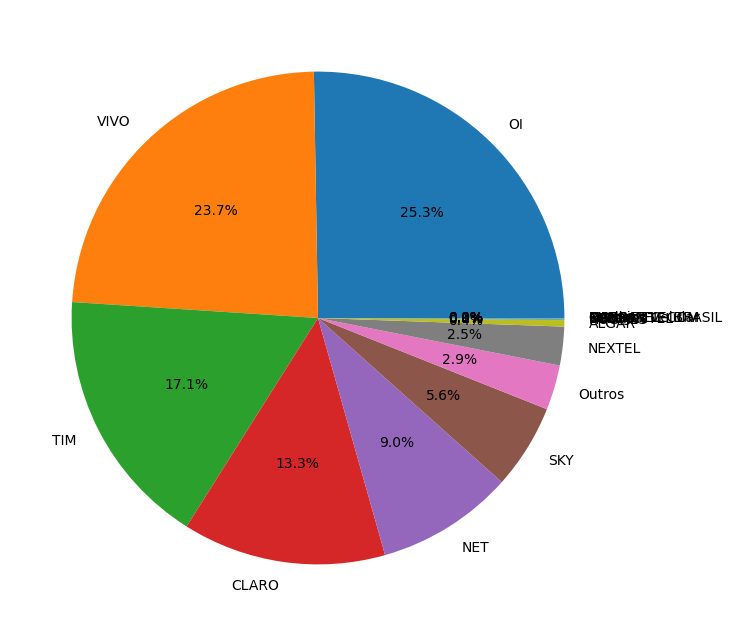

In [28]:
# Como esperado, as marcas mais populares têm mais registros de reclamações.
reclamacoes.groupby("Marca")["Marca"].count().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', figsize=(8, 8), labeldistance=1.1)
plt.ylabel("")

C:\Users\Tomaz\AppData\Local\Temp\ipykernel_2700\986135503.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reclamacoes.groupby("TipoAtendimento")["TipoAtendimento"].count().plot.pie(autopct='%1.1f%%', figsize=(6, 6))


Text(0, 0.5, '')

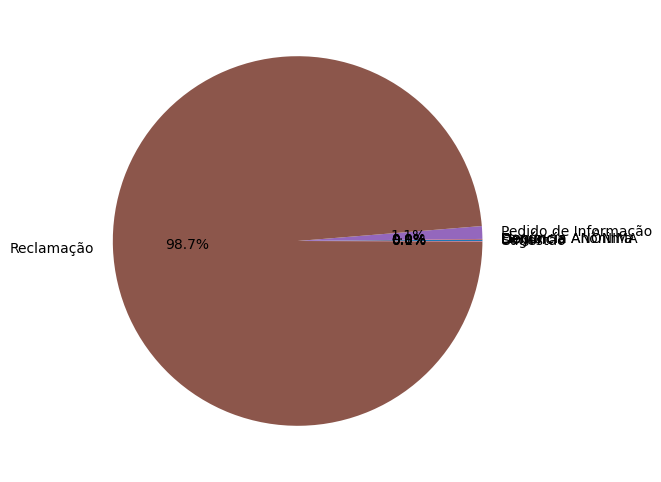

In [31]:
# Vamos ver quais foram os tipos de atendimento mais comuns:
reclamacoes.groupby("TipoAtendimento")["TipoAtendimento"].count().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.ylabel("")

C:\Users\Tomaz\AppData\Local\Temp\ipykernel_2700\2595251210.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = reclamacoes.pivot_table(index='AnoMês', columns='Marca', values='Count', aggfunc='sum', fill_value=0, )


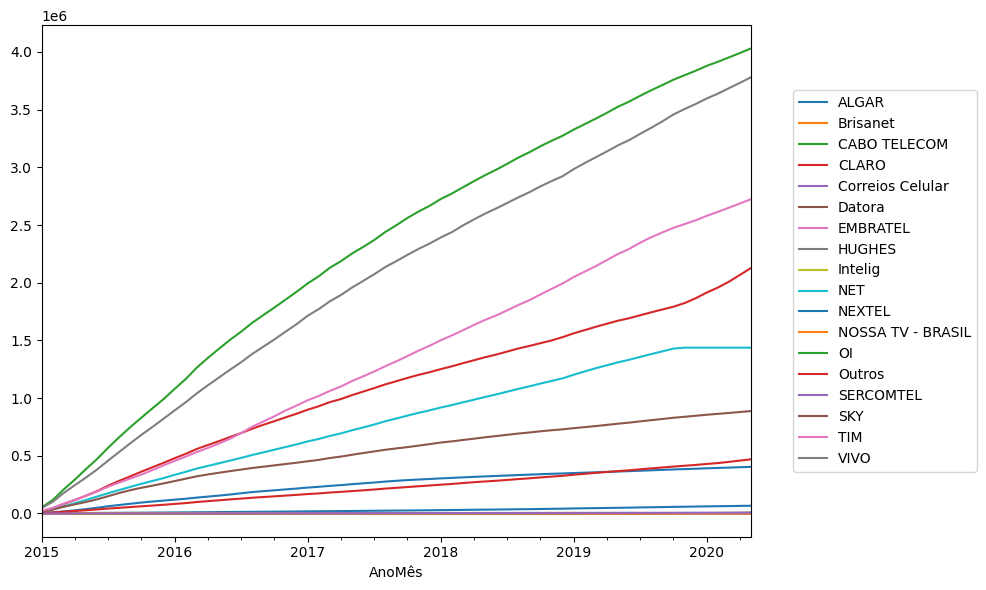

In [36]:
# A enorme maioria foram reclamações.
# Vamos ver como os registros por marca evoluíram com o tempo:
reclamacoes['Count'] = 1
pivot = reclamacoes.pivot_table(index='AnoMês', columns='Marca', values='Count', aggfunc='sum', fill_value=0, )
cumulativo = pivot.cumsum()
ax = cumulativo.plot(figsize=(10,6))
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()

# Pode-se ver que a NET não recebeu mais reclamações no meio de 2019, e simultaneamente, as reclamações para a CLARO aumentaram. Isso ocorreu pelo fato de a NET ser incorporada à CLARO em Julho de 2019. A diminuição da inclinação da curva CABO TELECOM com o tempo mostra como essa marca vem se tornando menos popular.